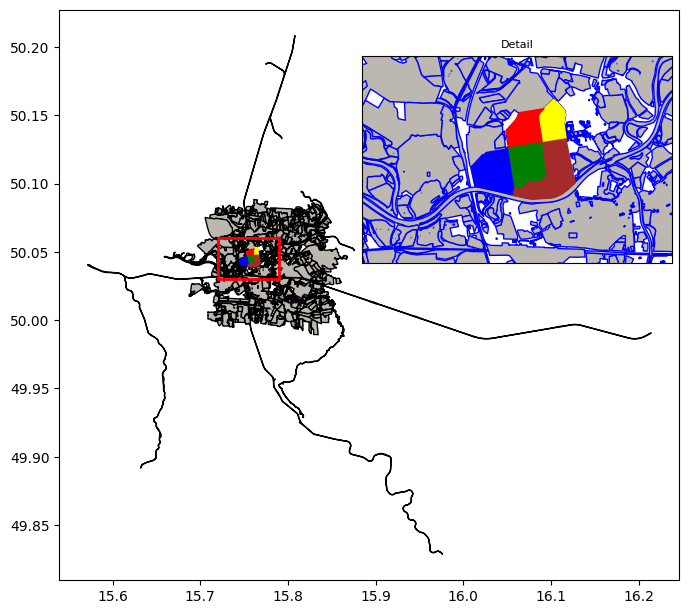

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# Pardubice - polygon layer
Pardubice = gpd.read_file("Pardubice_shp", layer="Pardubice_poly").to_crs(epsg=4326)

# OSM data
osm_data1 = gpd.read_file("Polygon_Polabiny1.geojson").to_crs(epsg=4326)
osm_data2 = gpd.read_file("Polygon_Polabiny2.geojson").to_crs(epsg=4326)
osm_data3 = gpd.read_file("Polygon_Polabiny3.geojson").to_crs(epsg=4326)
osm_data4 = gpd.read_file("Polygon_Polabiny4.geojson").to_crs(epsg=4326)
osm_data5 = gpd.read_file("Polygon_Polabiny5.geojson").to_crs(epsg=4326)


# Zoom rectangle coordinates
x_min, x_max = 15.72, 15.79
y_min, y_max = 50.03, 50.06

# Main map
fig, ax = plt.subplots(figsize=(8, 8))
Pardubice.plot(ax=ax, color="#BCB8B1", edgecolor="black")
# OSM plot
osm_data1.plot(ax=ax, color="yellow", edgecolor="yellow", linewidth=1.0)
osm_data2.plot(ax=ax, color="red", edgecolor="red", linewidth=1.0)
osm_data3.plot(ax=ax, color="green", edgecolor="green", linewidth=1.0)
osm_data4.plot(ax=ax, color="blue", edgecolor="blue", linewidth=1.0)
osm_data5.plot(ax=ax, color="brown", edgecolor="brown", linewidth=1.0)

# Draw zoom rectangle
rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                 linewidth=2, edgecolor="red", facecolor="none")
ax.add_patch(rect)

# Inset map
iax = inset_axes(ax, width="50%", height="50%", loc="upper right")
Pardubice.plot(ax=iax, color="#BCB8B1", edgecolor="blue")
osm_data1.plot(ax=iax, color="black", edgecolor="black", linewidth=1.5)
osm_data1.plot(ax=iax, color="yellow", edgecolor="yellow", linewidth=1.0)
osm_data2.plot(ax=iax, color="red", edgecolor="red", linewidth=1.0)
osm_data3.plot(ax=iax, color="green", edgecolor="green", linewidth=1.0)
osm_data4.plot(ax=iax, color="blue", edgecolor="blue", linewidth=1.0)
osm_data5.plot(ax=iax, color="brown", edgecolor="brown", linewidth=1.0)
iax.set_xlim(x_min, x_max)
iax.set_ylim(y_min, y_max)
iax.set_xticks([])
iax.set_yticks([])
iax.set_title("Detail", fontsize=8)

plt.show()
# DALSI_PRVKY_MAPY_L
# BUDOVY_P

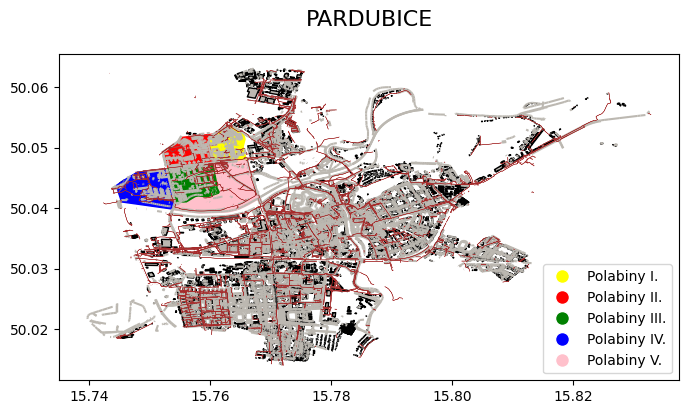

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# Pardubice - SHP
Pard1 = gpd.read_file("717657", layer="BUDOVY_P").to_crs(epsg=4326)
Pard2 = gpd.read_file("717657", layer="DALSI_PRVKY_MAPY_L").to_crs(epsg=4326)
Pard3 = gpd.read_file("717657", layer="VB_P").to_crs(epsg=4326)
# OSM data
osm_data1 = gpd.read_file("Polygon_Polabiny1.geojson").to_crs(epsg=4326)
osm_data2 = gpd.read_file("Polygon_Polabiny2.geojson").to_crs(epsg=4326)
osm_data3 = gpd.read_file("Polygon_Polabiny3.geojson").to_crs(epsg=4326)
osm_data4 = gpd.read_file("Polygon_Polabiny4.geojson").to_crs(epsg=4326)
osm_data5 = gpd.read_file("Polygon_Polabiny5.geojson").to_crs(epsg=4326)
# Main map
fig, ax = plt.subplots(figsize=(8, 8))
Pard1.plot(ax=ax, color="#BCB8B1", edgecolor="black", zorder=1)
Pard2.plot(ax=ax, color="#BCB8B1", edgecolor="grey", zorder=2)
Pard3.plot(ax=ax, color="#BCB8B1", edgecolor="brown", linewidth=0.3, zorder=3)
# OSM plot
osm_data1.plot(ax=ax, color="yellow", edgecolor="yellow", linewidth=1.0)
osm_data2.plot(ax=ax, color="red", edgecolor="red", linewidth=1.0)
osm_data3.plot(ax=ax, color="green", edgecolor="green", linewidth=1.0)
osm_data4.plot(ax=ax, color="blue", edgecolor="blue", linewidth=1.0)
osm_data5.plot(ax=ax, color="pink", edgecolor="pink", linewidth=1.0)
ax.set_aspect('equal')

# Definice legendy
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Polabiny I.'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Polabiny II.'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Polabiny III.'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Polabiny IV.'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='Polabiny V.')
]
# Přidání nadpisu
ax.set_title("PARDUBICE", fontsize=16, loc='center', pad=20)

# Přidání legendy do grafu
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Uložení grafu
plt.savefig("graf_Pardubice_Polabiny.png", dpi=300, bbox_inches='tight', transparent=True)

plt.show()

In [18]:
import os
import zipfile
from collections import Counter

zip_path = '717657.zip'

with zipfile.ZipFile(zip_path, 'r') as z:
    names = z.namelist()
    # Odfiltrujeme adresáře (ty končí '/')
    files = [os.path.splitext(os.path.basename(name))[0]
             for name in names if not name.endswith('/')]
# Pokud chceš i soubory bez přípony, výše splitrox rozpozná
counts = Counter(files)

for name, count in counts.items():
    print(f"{name}: {count}")


BODOVE_POLE_B: 5
BODOVE_POLE_T: 5
BUDOVY_B: 5
BUDOVY_P: 5
BUDOVY_DEF: 5
PARCELY_KN_B: 5
PARCELY_KN_L: 5
PARCELY_KN_T: 5
PARCELY_KN_P: 5
PARCELY_KN_DEF: 5
DALSI_PRVKY_MAPY_B: 5
DALSI_PRVKY_MAPY_L: 5
DALSI_PRVKY_MAPY_T: 5
HRANICE_PARCEL_L: 5
PRVKY_ORIENT_MAPY_B: 5
PRVKY_ORIENT_MAPY_L: 5
PRVKY_ORIENT_MAPY_T: 5
VB_P: 5
KATASTRALNI_UZEMI_L: 5
KATASTRALNI_UZEMI_P: 5
KATASTRALNI_UZEMI_DEF: 5


<Axes: >

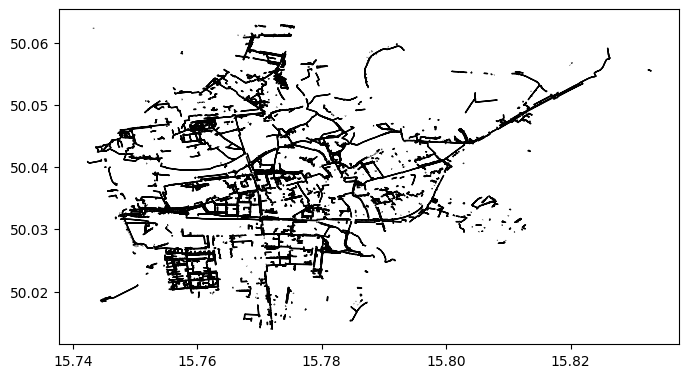

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# Pardubice - SHP
Pard1 = gpd.read_file("717657", layer="VB_P").to_crs(epsg=4326)
# Main map
fig, ax = plt.subplots(figsize=(8, 8))
Pard1.plot(ax=ax, color="#BCB8B1", edgecolor="black", aspect='equal')


In [64]:
# pip install folium branca mapclassify matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 3.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
